# Logistic Regression - Smarket dataset
### Predict the direction of stock price (up or down) from the previous close
* using the ISLR package - and the glm( ) function

## Load Data
* Smarket dataset - shows daily S&P 500 percentage returns from 2001-2005
* dataset is part of the ISLR package

In [1]:
require(ISLR)

Loading required package: ISLR


## Explore Data
* using names( ), head( ), and summary( )

In [2]:
names(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [3]:
head(Smarket)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


In [4]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

* Direction - will be the target variable

## Visualize the Data
* plot a histogram - of numeric variables

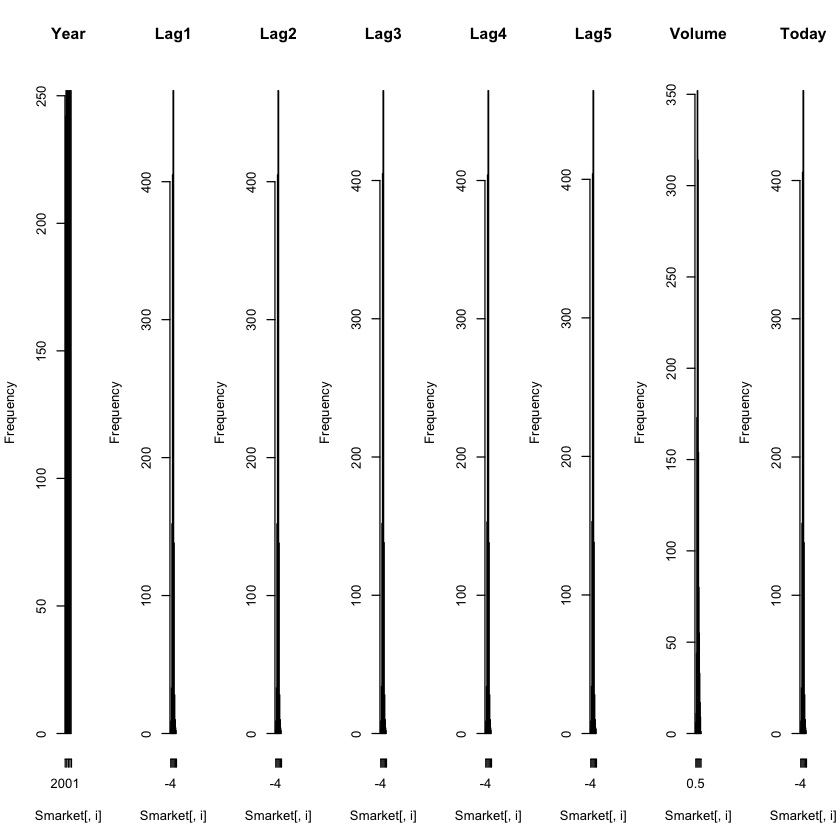

In [5]:
par(mfrow=c(1,8))

for(i in 1:8) {
    hist(Smarket[,i], main=names(Smarket)[i])
}

### View the distribution differently
* plot a box and whiskers plot

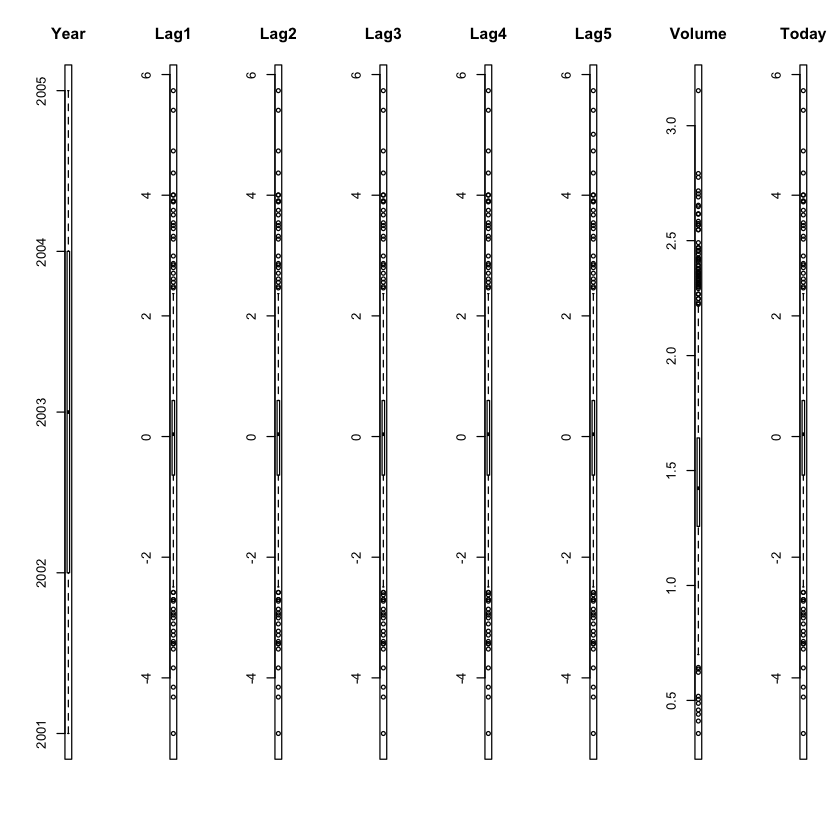

In [7]:
par(mfrow=c(1,8))

for(i in 1:8) {
    boxplot(Smarket[,i], main=names(Smarket)[i])
}

### View a Missing Plot
* get an idea of the amount of missing data

In [9]:
install.packages('Amelia')

also installing the dependency ‘RcppArmadillo’




The downloaded binary packages are in
	/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T//RtmpvvFH3h/downloaded_packages


In [10]:
install.packages('mlbench')


The downloaded binary packages are in
	/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T//RtmpvvFH3h/downloaded_packages


Loading required package: Rcpp
Warning message:
“package ‘Rcpp’ was built under R version 3.5.2”## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2019 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


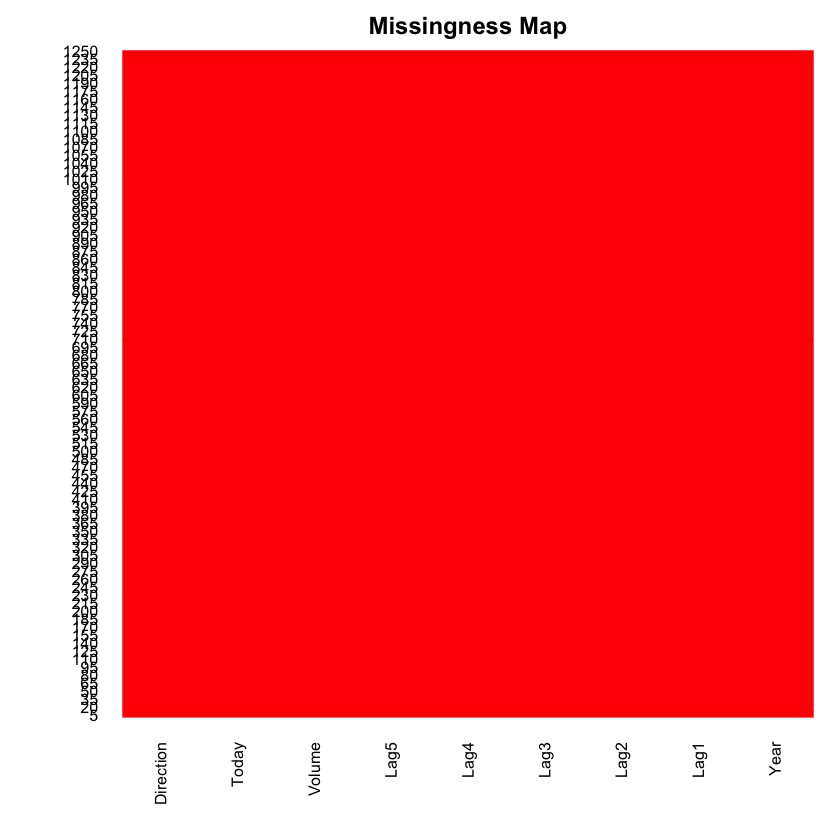

In [11]:
library(Amelia)
library(mlbench)

missmap(Smarket, col=c("blue", "red"), legend=FALSE)

* Looks like there is no missing data

### Calculate the Correlations - between each numeric variable
* plot the pair-wise correlations in a correlation matrix

In [13]:
install.packages('corrplot')


The downloaded binary packages are in
	/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T//RtmpvvFH3h/downloaded_packages


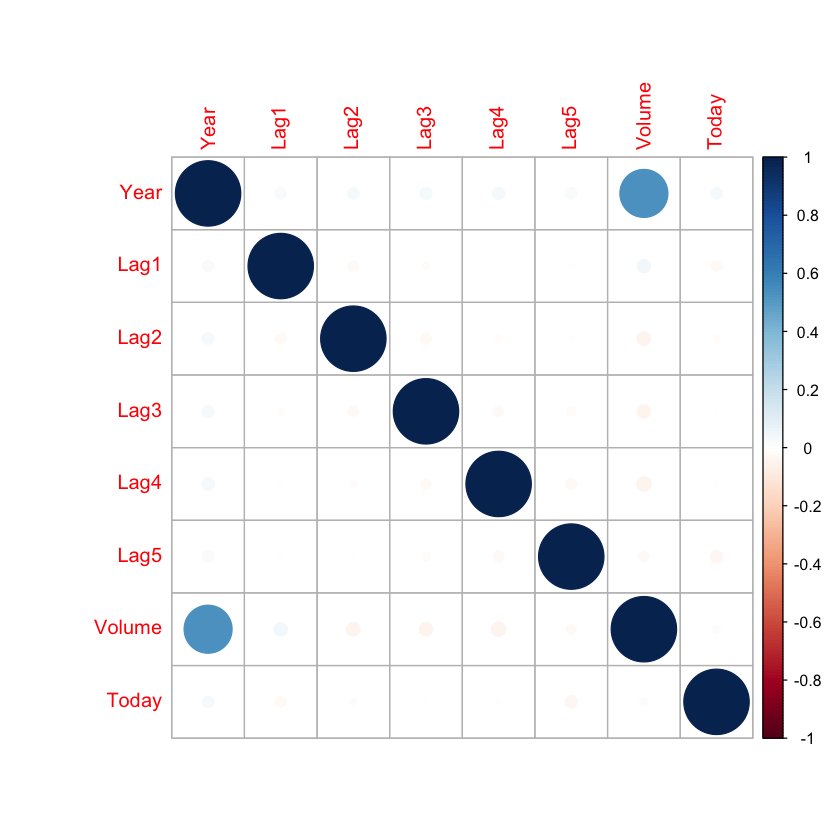

In [15]:
library(corrplot)

correlations <- cor(Smarket[,1:8])
corrplot(correlations, method="circle")

* Dot size and color correspond to correlation - larger, and more blue equate to greater correlation
* There are large dark blue circles, perfectly diagonal - because the variables are only correlated with themselves

### Make a different Plot - a Scatterplot
* use the pairs( ) function
* binary target variable, Direction - should indicate the color

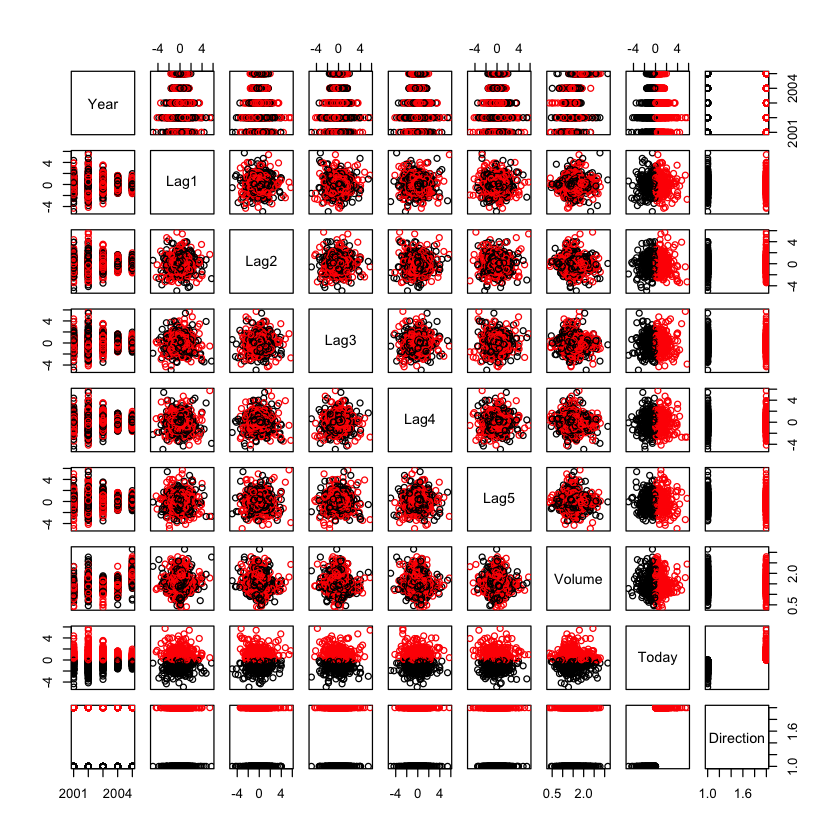

In [16]:
pairs(Smarket, col=Smarket$Direction)

* not much clear correlation here

### Plot a Density Distribution - again against the Direction variable 

In [17]:
install.packages('caret')

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘RcppRoll’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’




The downloaded binary packages are in
	/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T//RtmpvvFH3h/downloaded_packages


Warning message:
“package ‘caret’ was built under R version 3.5.2”Loading required package: lattice
Loading required package: ggplot2
Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”

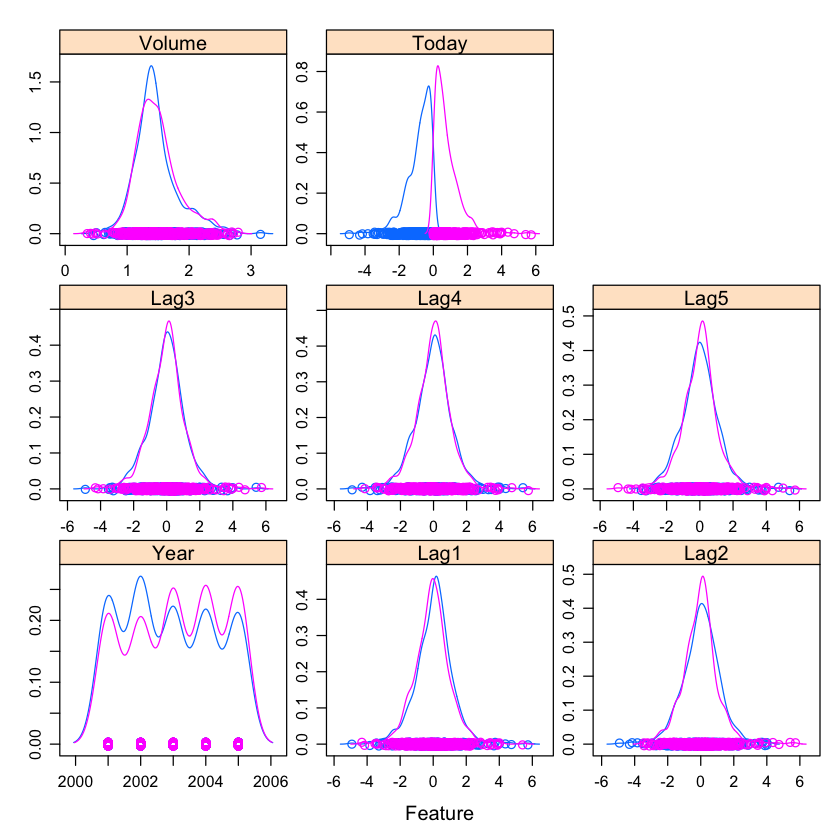

In [18]:
library(caret)

x <- Smarket[,1:8]

y <- Smarket[,9]

scales <- list(x=list(relation="free"), y=list(relation="free"))

featurePlot(x=x, y=y, plot="density", scales=scales)

* the overlap (of blue and pink lines) - suggests difficulty in predicting Direction

# Build a Model - Logistic Regression
### with the function - glm.fit( )
* 1st argument - R formula, listing Direction as the Target/Response & Lag, Volume variables as Predictors

### glm( ) functions - generalized linear models
* for logistic - set family argument, to binomial

In [19]:
glm.fit <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data=Smarket, family=binomial)

### View details about the fit - with summary( )
* returns several metrics - z-scores, coefficient p-values, standard errors, etc.

In [20]:
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


* none of the p-values are low
* null deviance - deviance for the mean
* residual deviance - deviance for the model with all variables
    * not much of a difference between these two, and only 6 degrees of freedom
    
### Assign the predictions of glm.fit( ) - to glm.probs
* set type, to response
    * predictions returned as Vector of fitted Probabilities
* view the 1st 5 predictions    

In [21]:
glm.probs <- predict(glm.fit, type="response")

glm.probs[1:5]

1         2         3         4         5 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812

* each of these predictions is near 50 %

### Turn predictions (probabilities) to classifications (Up or Down) - set a threshold at 0.5
* use ifelse( )
* can now predict whether market will be "Up" or "Down"

In [22]:
glm.pred <- ifelse(glm.probs > 0.5, "Up", "Down")

* glm.pred - Vector of Trues & Falses
* if glm.probs is > 0.5, glm.pred calls "Up"

### Attach the Smarket dataframe - make a Table of glm.pred
* table should display Ups & Downs, from the previous day
* get the mean of these Directions

In [23]:
attach(Smarket)

table(glm.pred, Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [24]:
mean(glm.pred == Direction)

[1] 0.5216

* there are 145 correct Down predictions - 507 correct Up predictions
    * but nearly as many Incorrect predictions too

# A Better Approach - Training & Test sets
* split the data - set Training data to years prior to 2005
* apply glm.fit( ) once again
* apply the predict( ) function to glm.probs once again
    * use Smarket data, indexed to !train
* again create "Up" & "Down" classifications

In [26]:
train = Year<2005

glm.fit <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data=Smarket, family=binomial,
           subset=train)

glm.probs <- predict(glm.fit, newdata=Smarket[!train,], type="response")

glm.pred <- ifelse(glm.probs > 0.5, "Up", "Down")

### Make a New Variable - for storing the Test data
* this data covers 2005 - name it Direction.2005

In [27]:
Direction.2005 = Smarket$Direction[!train]

table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

In [28]:
mean(glm.pred == Direction.2005)

[1] 0.4801587

* there are 77 correct Down predictions - 44 correct Up predictions
    * but even more Incorrect predictions

#### These results, with a lack of improvement - may be explained by Overfitting
### Attempt to Fit a smaller model - using only Lag1, Lag2, Lag3 as predictors
* the remaining code is similar

In [31]:
glm.fit = glm(Direction ~ Lag1 + Lag2 + Lag3, data=Smarket, family=binomial, subset=train)

glm.probs = predict(glm.fit, newdata=Smarket[!train,], type="response")

glm.pred = ifelse(glm.probs > 0.5, "Up", "Down")

table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   39  31
    Up     72 110

In [32]:
mean(glm.pred == Direction.2005)

[1] 0.5912698

* there are 39 correct Down predictions - 110 correct Up predictions
    * slightly less Incorrect predictions (by ratio of correct-incorrect) than the previous 2 models
* the Classification rate - 59.13 % 
    * slightly higher than the previous 2 models

### Take a summary( ) - of glm.fit

In [33]:
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3, family = binomial, 
    data = Smarket, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.338  -1.189   1.072   1.163   1.335  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.032230   0.063377   0.509    0.611
Lag1        -0.055523   0.051709  -1.074    0.283
Lag2        -0.044300   0.051674  -0.857    0.391
Lag3         0.008815   0.051495   0.171    0.864

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.4  on 994  degrees of freedom
AIC: 1389.4

Number of Fisher Scoring iterations: 3


# CONCLUSION
### The model is not great, however the smaller model (using only 3 predictor variables) produced a smaller (better) AIC metric than the larger model
* 1389.4 compared to 1741.6